In [ ]:
import numpy as np
import pandas as pd

data=pd.read_csv('/content/creditcard.csv')
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Missing values after imputation:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Scaled features (Time and Amount):
       Time    Amount
0 -2.491257  0.212861
1 -2.491257 -0.358811
2 -2.491203  1.104006
3 -2.491203  0.111234
4 -2.491149 -0.096962

Shape of training set: (804

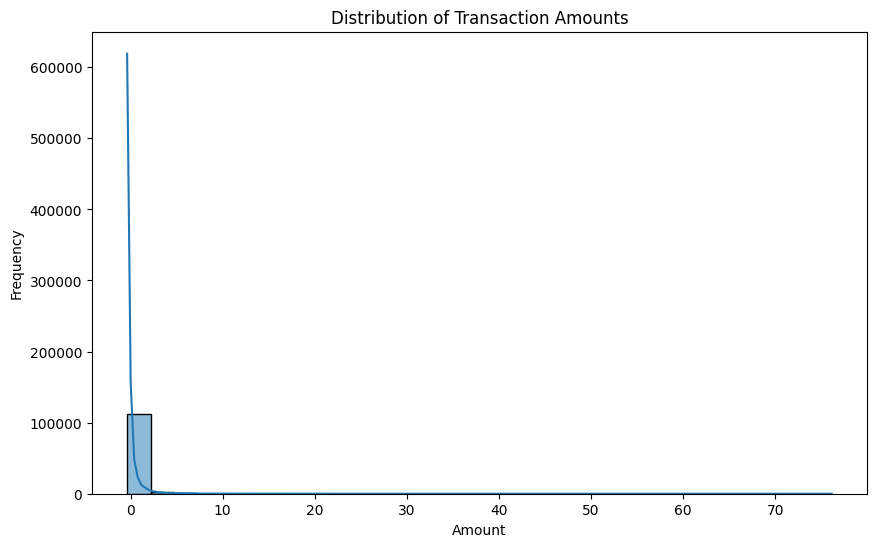

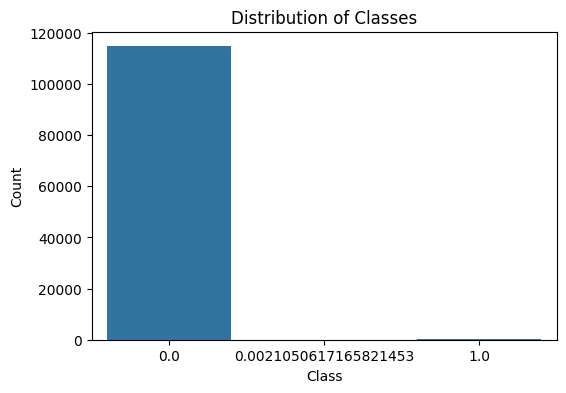


Unique labels in y_train: [0 1]
Validation Accuracy: 0.9998260264439806
F1 Score: 0.9411764705882353
Precision Score: 1.0
Recall Score: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17217
           1       1.00      0.89      0.94        27

    accuracy                           1.00     17244
   macro avg       1.00      0.94      0.97     17244
weighted avg       1.00      1.00      1.00     17244

Confusion Matrix:
[[17217     0]
 [    3    24]]


In [ ]:
# Step 1: Data Collection and Preprocessing
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Check for missing values
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(data.isnull().sum())

# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

# Verify the scaled features
print("\nScaled features (Time and Amount):")
print(data[['Time', 'Amount']].head())

# Split the dataset
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Confirm the shape of the datasets
print("\nShape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)
# Check the balance of the dataset
print(data['Class'].value_counts())

# Step 2: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of fraudulent vs legitimate transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Step 3: Feature Engineering
# No specific feature engineering in this example

# Step 4: Data Splitting
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 5: Model Selection
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

# Confirm label encoding
print("\nUnique labels in y_train:", y_train.unique())
# Step 6: Model Training
model.fit(X_train, y_train)

# Step 7: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluation on the validation set
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Evaluation on the validation set
val_predictions = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
print("F1 Score:", f1_score(y_val, val_predictions))
print("Precision Score:", precision_score(y_val, val_predictions))
print("Recall Score:", recall_score(y_val, val_predictions))
print("Classification Report:")
print(classification_report(y_val, val_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_val, val_predictions))




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import joblib

# Generate sample data for demonstration
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Train your machine learning model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Serialize (save) the trained model to a .pkl file
joblib.dump(model, 'trained_model.pkl')
# Load the trained model from the .pkl file
loaded_model = joblib.load('trained_model.pkl')

# Now, you can use loaded_model for making predictions


In [ ]:
from flask import Flask, request, jsonify
import joblib

# Load the trained model
model = joblib.load('/content/trained_model.pkl')

# Initialize Flask app
app = Flask(__name__)

# Define endpoint for model prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Get input data
    data = request.json

    # Perform inference using the loaded model
    prediction = model.predict([data['features']])[0]

    # Format the prediction
    result = {'prediction': int(prediction)}

    # Return the prediction as JSON response
    return jsonify(result)

if __name__ == '__main__':
    # Run the Flask app
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('/content/trained_model.pkl')


# Assuming 'Class' column represents the target variable indicating fraud (1) or not (0)

# Preprocessing: Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

# Select a few rows as new transaction data (e.g., last few rows of the dataset)
new_transaction_data = data.tail(5).copy()

# Remove the 'Class' column as it represents the target variable
new_transaction_data.drop('Class', axis=1, inplace=True)

# Make predictions on the new transaction data
predictions = model.predict(new_transaction_data.iloc[:, :4])

# Assuming predictions are binary (0 for legitimate transactions, 1 for fraudulent transactions)
# Convert predictions to a human-readable format (e.g., 'Legitimate' or 'Fraudulent')
fraud_labels = ['Legitimate', 'Fraudulent']
predicted_labels = [fraud_labels[prediction] for prediction in predictions]

# Add the predicted labels to the new transaction data
new_transaction_data['Predicted Class'] = predicted_labels

# Display the result
print("Predicted Classes for New Transactions:")
print(new_transaction_data)


Predicted Classes for New Transactions:
            Time        V1        V2        V3        V4        V5        V6  \
114957  1.492544 -2.197480  1.982629  0.259502  0.924323 -0.879938 -0.135952   
114958  1.492544 -2.197480  1.982629  0.259502  0.924323 -0.879938 -0.135952   
114959  1.492544  1.255655  0.293362  0.288616  0.701727 -0.447134 -1.093442   
114960  1.492544  1.270638 -0.089535 -0.990690 -0.375303  0.652307 -0.073908   
114961  1.492598  1.295784  0.049457 -1.301814 -0.476648  2.131357  3.184446   

              V7        V8        V9  ...       V21       V22       V23  \
114957 -0.380186  0.611134  0.278764  ... -0.033516 -0.367199 -0.099698   
114958 -0.380186  0.611134  0.278764  ... -0.033516 -0.367199 -0.099698   
114959  0.029565 -0.155947  0.160172  ... -0.297287 -0.898954  0.139494   
114960  0.394543 -0.164288 -0.317251  ... -0.067492 -0.344301 -0.372630   
114961 -0.494416  0.802781 -0.075014  ... -0.033882 -0.110877 -0.036393   

             V24       V25  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
